# Kalorimetrie Laborversuch

Author: Paul Braun

Datum: 07.12.2023

Gruppe: 18

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Nutzen Sie hier Ihr eigenes Bild.

In einem Topf wird Wasser auf 80 Grad Celsius erwärmt und auf einem Magnetrührer daneben steht ein Becherglas. Links neben dem Tisch ist eine Halterung für die Temperatursensoren und den Tauchsieder. rechts vom Tisch ist eine Amatur um die Spannung und Stromstärke einzustellen und ein Sicherheitsschalter. Im Topf und am Tisch ist ebenfalls ein Temperatursensor. Alle Temperatursensoren sind mit einem Raspberry Pi links neben dem tisch verbunden. 

Bestimmung Kalorimeterkonstante: 
Als erstes wurde das Becherglas mit 400g Wasser befüllt. Nachdem das BEcherglas auf den Magnetrührer gestellt wurde, wurde dieser auf 1500 rpm gestellt. Nach dem warmlaufen des Tauchsieders wurde die Messung gestartet und nach 30s wurder der Tauchsieder für 180s eingeschaltet und nach weiteren 30s wurde die Messung beendet. 

Bestimmung Wärmekapazitäten Proben: 
Nachdem alle Proben für 3 Minuten im Wasserbad lagen wurde jede nach folgendem Schema vermessen:<br>
-Becherglas mit 400g Wasser befüllen <br>
-Magnetrührer auf 1500 rpm stellen <br>
-Messung starten <br>
-nach ca. 20s Probe aus dem Wasserbad entnehmen und Wasser abtropfen lasssen <br>
-nach 30s Probe in das Becherglas legen und Deckel schließen <br>
-Temperaturen beobachten bis alle Temperatursensoren gleiche oder abfallende Werte zurückgeben <br>
-Messung 30s später beenden <br>
-Probe entfernen und vollständig abtropfen lassen <br>
-Wasser wiegen

<img src="figures/vergessen_ein_Foto_zu_machen.jpg" width="800">


## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
import importlib

from pprint import pprint

from functions import m_json
from functions import utility

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Kalorimeterkonstante
Hinweis: Sie können die Funktion *get_json_entry* nutzen um auf Metadaten zuzugreifen. 

Für die Messdatenauswertung steht Ihnen bereits ein Modul utility.py zur Verfügung. Ergänzen sie die Funktionen im Modul zwischen TODO und DONE. Sie finden weitere Hinweise im jeweiligen Bereich TODO->DONE. 


#### (i) Messdaten einlesen
Lesen Sie die Messdaten in ihr Notebook ein.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_const = "data/calorimetry_constant/calorimetry_constant.h5"

# DONE #

In [3]:
 importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_const, "RawData")

# DONE #

In [4]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
# List the index of all calorimeter sensors (index_calorimeter) and
# the environment sensor (index_environment).
# You can use this variables to easily get access to the correct measurement data later.
n = "name"
t = "temperature"
t_cal = t+"_calorimeter"
t_env = t+"_environment"
t_hwb = t+"_hot_water_bath"
T = "Temperature"

index_calorimeter = [i for  i,name in enumerate(data_dict[n]) if t_cal in name]
index_environment = [i for  i,name in enumerate(data_dict[n]) if t_env in name]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

Die Mittelwerte und Standardabweichungen der Messungen werden in der nächsten Sektion geplottet.

Nachdem die Mittelwerte und Standardabweichungen berechnet wurden, können Daten jeder Wärmequelle jeweils in einem numpy.ndarray gespeichert werden.

In [5]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of the calorimeter sensors and the environment sensor.
# You can use the indices from above. 
mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict[t][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict[t][index_environment])

#print(data_dict["temperature"][index_calorimeter])
# DONE #

#### (iii) Daten ploten

Im Kalorimeter befinden sich mehrere Sensoren, deren Mittelwerte sowie Standardabweichungen der Messung an jeden Zeitpunkt bestimmt wurden. Die Messdaten bzw. ihre Mittelwerte sollen in einem Plot eingetragen werden. Die Standardabweichungen der Sensoren sind als Errorbar im Plot zu sehen.

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


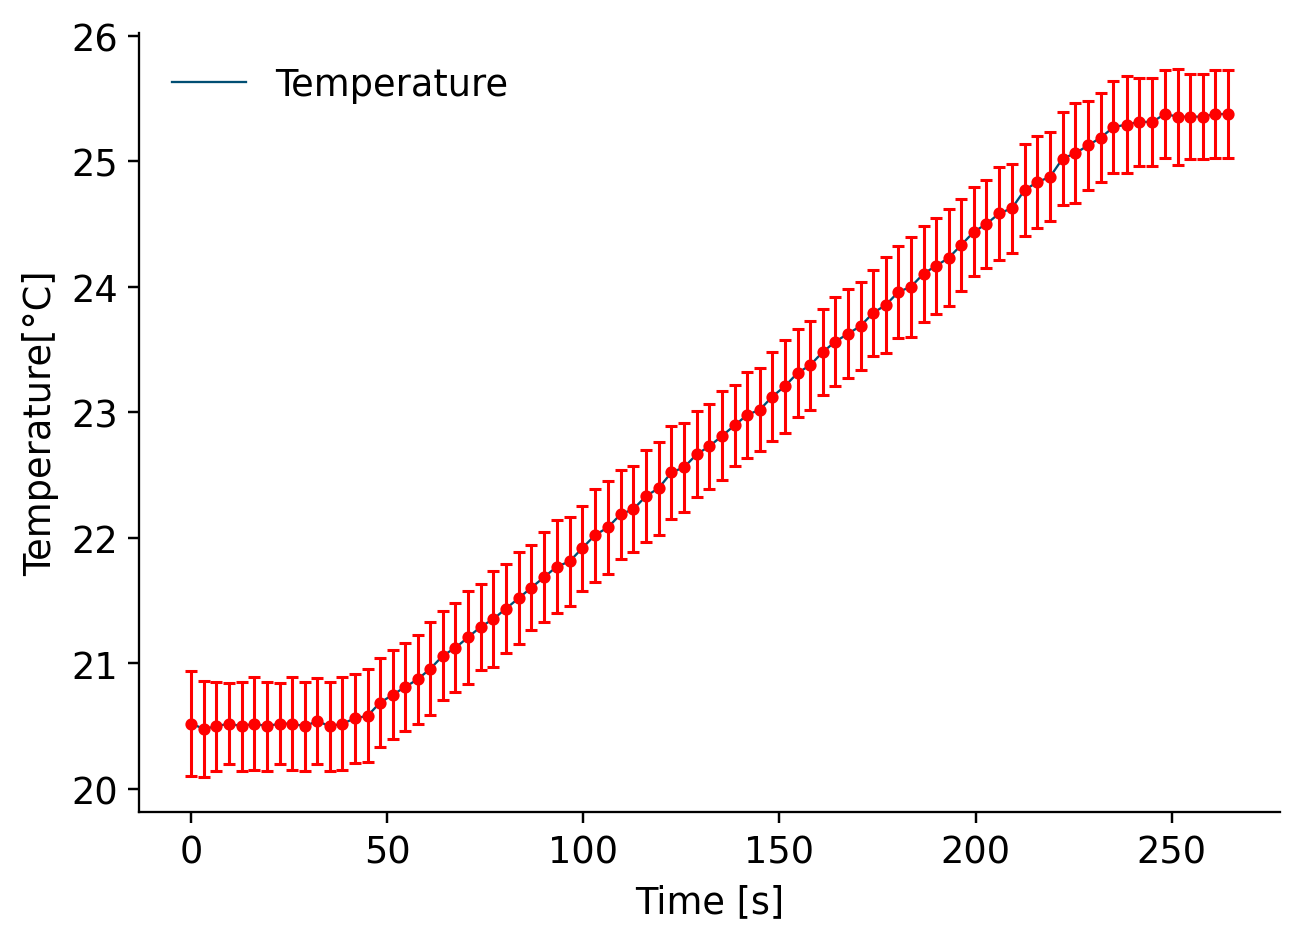

In [6]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting
time = np.mean(data_dict["timestamp"][index_calorimeter],axis=0)
utility.plot_temp_over_time([mean_std_calorimeter], [time - time[0]], [T], "Time [s]", T+"[°C]")

# DONE #

#### (iv) Metadaten auslesen

Die notwendigen Daten bzw. Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [7]:
# Heat capacity of Water has been given
c_w = 4.18
m = "mass"
p = "probe"
v = "value"
# TODO: Read mass of the water from the metadata of the experiment.
uuid_cal = "1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753"
water_mass = m_json.get_json_entry("datasheets", uuid_cal, ["calorimeter", "medium", m, v])

# DONE #

In [8]:
# TODO: Reading heater related data from hdf5 file, please use the same datafile_path_const variable for the HDF5 path.
# Hint: Note whether the data is stored as an array or a scalar in the hdf5 dataset.
with h5.File(datafile_path_const, "r") as f:
    uuid_act = "1ee21744-0355-6023-94b4-d5c041dd32cd"
    current = f["RawData/"+ uuid_act +"/current"][()]
    heat_time = f["RawData/"+ uuid_act +"/heat_time"][()]
    voltage = f["RawData/"+ uuid_act +"/voltage"][()]

# DONE #

#### (v) Anfangs- und Endwert der Temperatur
Die Anfangs- und Endwert der Temperatur im Kloriemeter sind notwendig, um die Wärmekapazität zu bestimmen. 

Eine Möglichkeit wäre, durch das Maxium bzw. Minium und einen Schwellenwert ist ein Teil der Daten zu entnehmen. 

Daraus sind Mittelwerte zu berechnen. Die entsprechenden Mittelwerte können als Anfangs- und Endtemperatur verwendet werden.

In [9]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity
temperature_end, temperature_start = utility.get_start_end_temperature(data_dict[t][index_calorimeter]) 

#print(temperature_end, temperature_start)
# DONE #

#### (vi) Kalorimeterkonstante bestimmen
$$
C = \frac{UI\Delta \tau}{(T_2 - T_1)}
$$

In [10]:
# TODO: Calculate heat capacity of the calorimeter

calorimeter_const = (voltage*current*heat_time)/(temperature_end-temperature_start)

# DONE #

#### (Vii) Ergebnis

In [11]:
print(calorimeter_const)

1582.4175824175825


### spezifische Wärmekapazität: erste Probe


#### (i) Messdaten einlesen

In [12]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob1 = "data/PDC004/PDC004.h5"

# DONE #

In [13]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob1, "RawData")

# DONE #

In [14]:


# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
index_calorimeter = [i for  i,name in enumerate(data_dict[n]) if t_cal in name]
index_bath = [i for  i,name in enumerate(data_dict[n]) if t_hwb in name]
index_env = [i for  i,name in enumerate(data_dict[n]) if t_env in name]


#print(data_dict["temperature"][index_calorimeter])
# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [15]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.
#data2 = data_dict["temperature"][index_env]
#data3 = data_dict["temperature"][index_bath]
mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict[t][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict[t][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict[t][index_bath])

# DONE #

#### (iii) Daten ploten

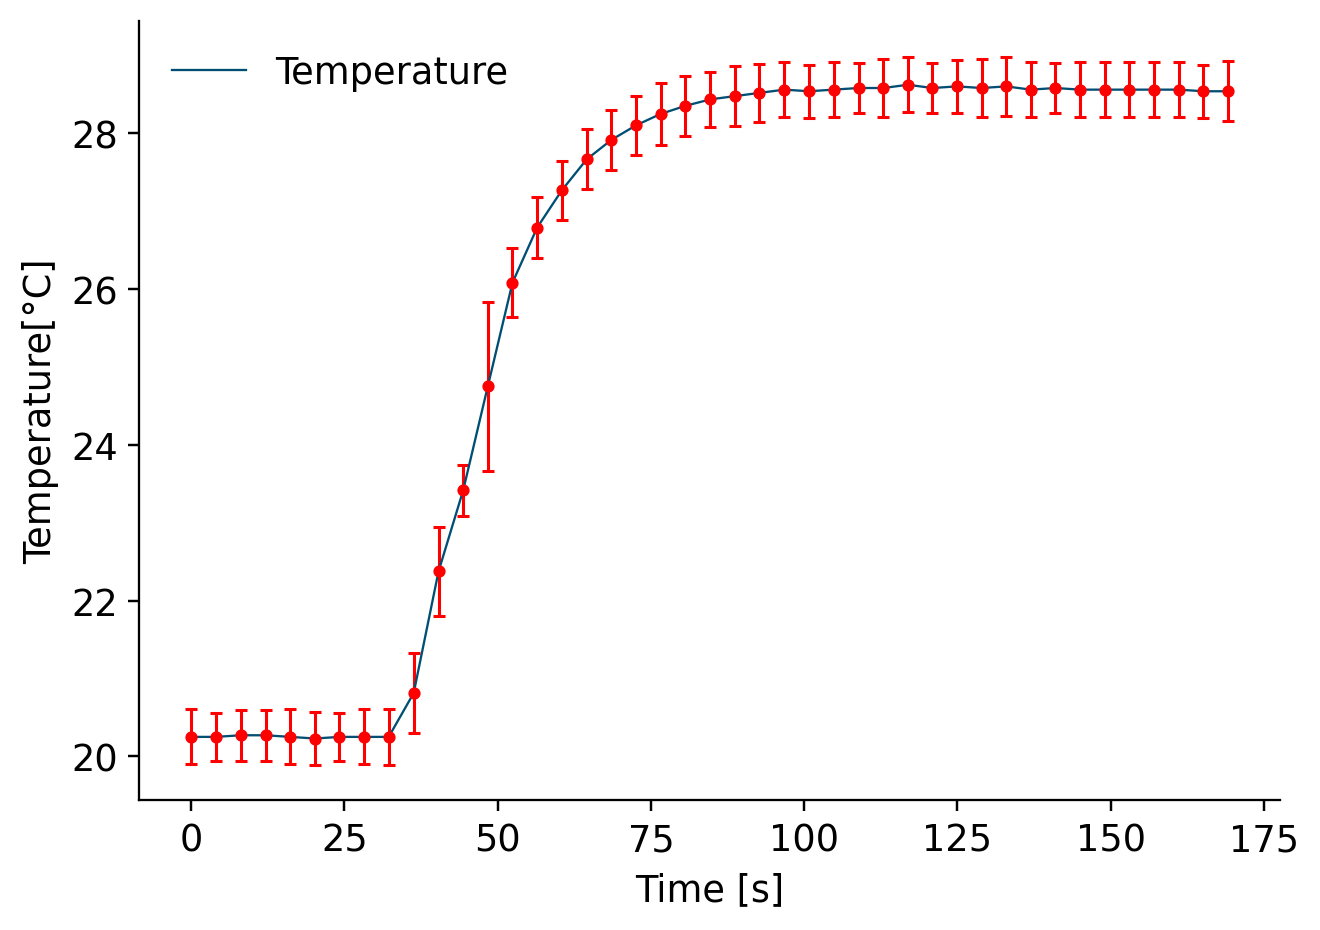

In [16]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.
time = np.mean(data_dict["timestamp"][index_calorimeter],axis=0)
utility.plot_temp_over_time([mean_std_calorimeter], [time - time[0]],[T],"Time [s]",T+"[°C]")

# DONE #

#### (iv) Metadaten auslesen

In [17]:
# TODO: Read mass of the sample from the metadata of the experiment.
uuid004 = "1ee57b2f-bfd6-6c0e-a6ed-d099248c61ab"
m_s1 = m_json.get_json_entry("datasheets", uuid004 , [p, m , v])

# DONE #

#### (v) Anfangs- und Endwert der Temperatur
Die Mischungstemperatur und Anfangstemperatur des Kalorimeters sind für die Berechnung relevant.

In [18]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict[t][index_calorimeter]) 

# DONE #

In [19]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.

temperature_start_sample = np.mean(data_dict[t][index_bath][:10])


# DONE #

#### (vi) spezifische Wärmekapazität bestimmen
$$
c_p = \frac{C(T_M-T_1)}{m_p(T_2-T_M)}
$$

In [20]:
# TODO: Calulate specific heat capacity of the sample.

c_s1 = (c_w*(temperature_mix-temperature_start_water))/(m_s1*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [21]:
print(c_s1)

0.001160164891532794


### spezifische Wärmekapazität: zweite Probe


#### (i) Messdaten einlesen

In [22]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob2 = "data/PDC012/PDC012.h5"

# DONE #

In [23]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob2, "RawData")

# DONE #

In [24]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [i for  i,name in enumerate(data_dict[n]) if t_cal in name]
index_bath = [i for  i,name in enumerate(data_dict[n]) if t_hwb in name]
index_env = [i for  i,name in enumerate(data_dict[n]) if t_env in name]

#print(data_dict["temperature"][index_calorimeter])
# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [25]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict[t][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict[t][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict[t][index_bath])

# DONE #

#### (iii) Daten ploten

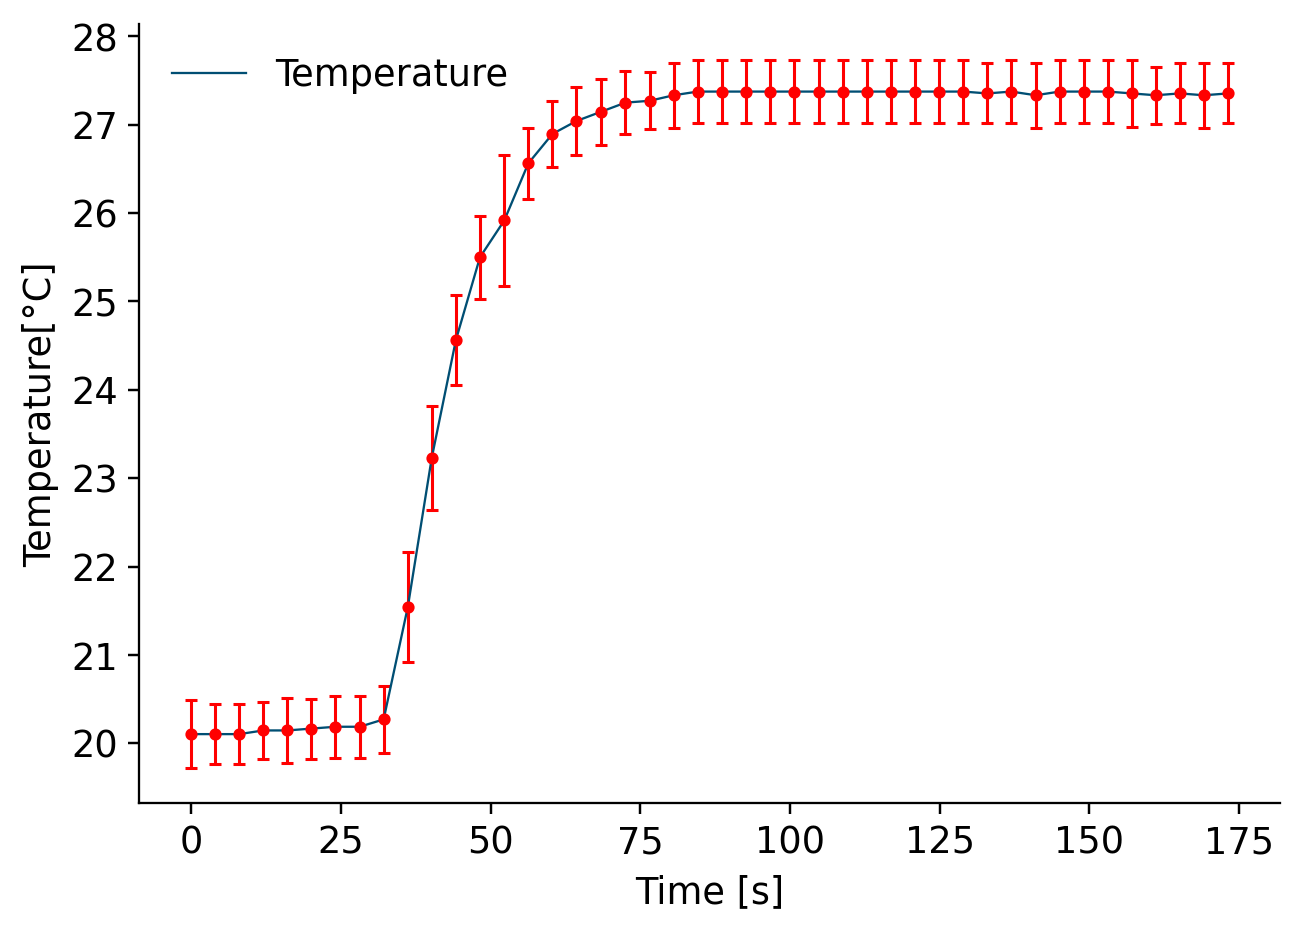

In [26]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.
time = np.mean(data_dict["timestamp"][index_calorimeter],axis=0)
utility.plot_temp_over_time([mean_std_calorimeter], [time - time[0]], [T], "Time [s]", T+"[°C]")

# DONE #

#### (iv) Metadaten auslesen

In [27]:
# TODO: Read mass of the sample from the metadata of the experiment.
uuid012 = "1ee57b38-1b08-63da-8b38-63a271236a0b"
m_s2 = m_json.get_json_entry("datasheets", uuid012, [p, m , v])

# DONE #

#### (v) Anfangs- und Endwert der Temperatur

In [28]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict[t][index_calorimeter]) 

# DONE #

In [29]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(data_dict[t][index_bath][:10])

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [30]:
# TODO: Calulate specific heat capacity of the sample.

c_s2 = (c_w*(temperature_mix-temperature_start_water))/(m_s2*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [31]:
print(c_s2)

0.0009157591358106173


### spezifische Wärmekapazität: dritte Probe


#### (i) Messdaten einlesen

In [32]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob3 = "data/PDC030/PDC030.h5"
# DONE #

In [33]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob3, "RawData")

# DONE #

In [34]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [i for  i,name in enumerate(data_dict[n]) if t_cal in name]
index_bath = [i for  i,name in enumerate(data_dict[n]) if t_hwb in name]
index_env = [i for  i,name in enumerate(data_dict[n]) if t_env in name]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [35]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict[t][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict[t][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict[t][index_bath])

# DONE #

#### (iii) Daten ploten

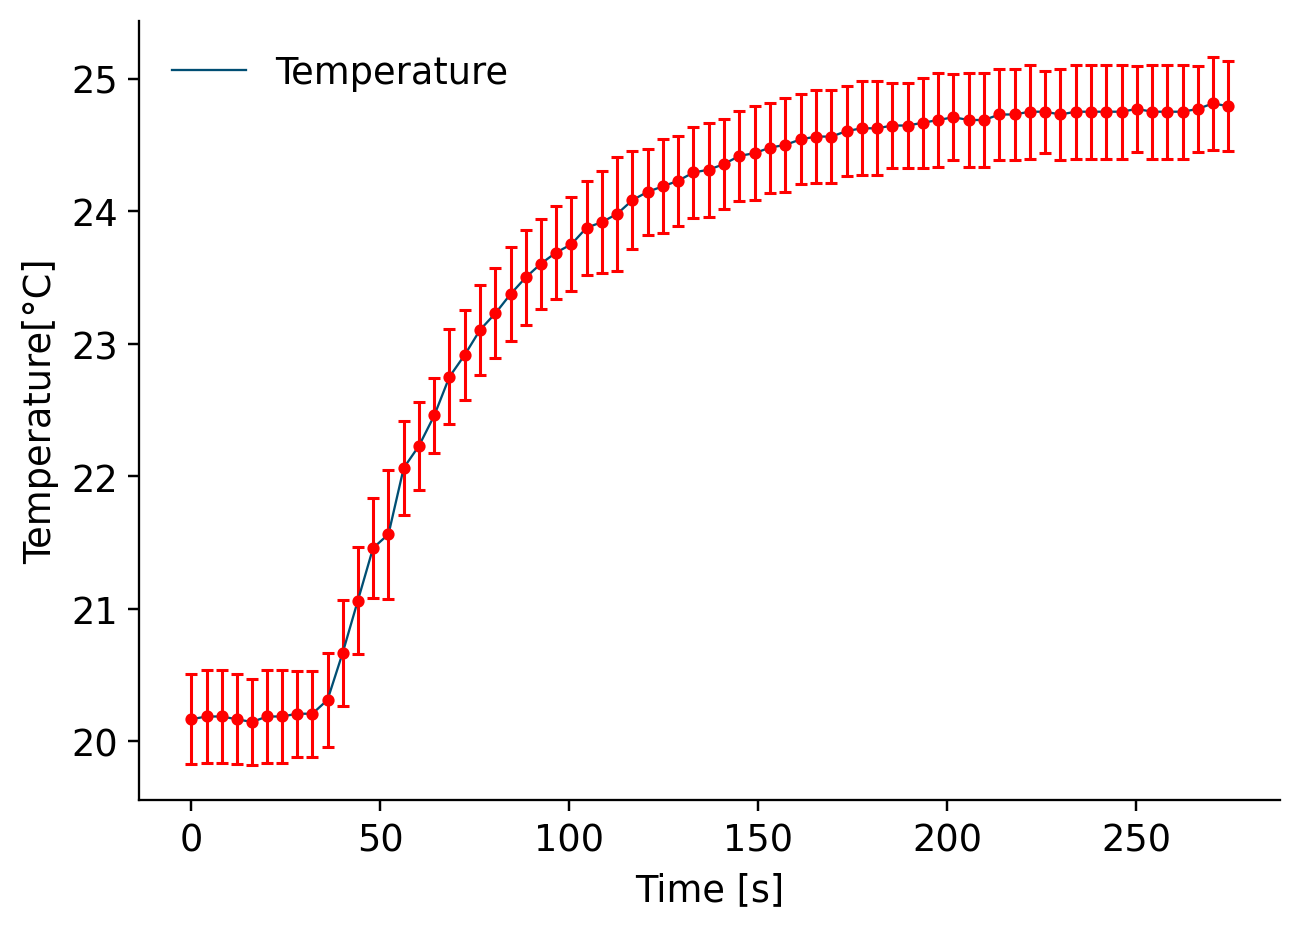

In [36]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.
time = np.mean(data_dict["timestamp"][index_calorimeter],axis=0)
utility.plot_temp_over_time([mean_std_calorimeter], [time - time[0]],[T],"Time [s]",T+"[°C]")

# DONE #

#### (iv) Metadaten auslesen

In [37]:
# TODO: Read mass of the sample from the metadata of the experiment.
uuid030 = "1ee7d44e-01cd-6c7e-9bef-cdb0fb992ba6"
m_s3 = m_json.get_json_entry("datasheets", uuid030 , [p ,m , v])

# DONE #

#### (v) Anfangs- und Endwert der Temperatur

In [38]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict[t][index_calorimeter]) 

# DONE #

In [39]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(data_dict[t][index_bath][:10])

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [40]:
# TODO: Calulate specific heat capacity of the sample.

c_s3 = (c_w*(temperature_mix-temperature_start_water))/(m_s3*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [41]:
print(c_s3)

0.004405608118045003


## Diskussion
Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage. Wie wirkt sich die mit der Probe aus dem Heißwasserbad transportierte Wassermenge auf das Ergebnis aus? Welche weiteren Fehlerquellen gibt es?

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch. <br>
Es ist durchaus sinnvoll in einer Gruppe die Aufgaben gut zu verteilen, damit man die Übersicht behält und keine Sachen doppelt oder überhaupt nicht macht. 